In [11]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as smf

import pymc as pm

In [4]:
DATA_PATH = Path("../data")
SEED = sum(map(ord, "Lecture 5, Statistical Rethinking"))
rng = np.random.default_rng(seed=SEED)

## Fork

### Discrete variables

In [5]:
n = 1000
Z = rng.binomial(1, 0.5, n)
X = rng.binomial(1, (1-Z)*0.1 + Z*0.9)
Y = rng.binomial(1, (1-Z)*0.1 + Z*0.9)

In [8]:
np.corrcoef(X, Y)

array([[1.        , 0.64453141],
       [0.64453141, 1.        ]])

In [9]:
np.corrcoef(X[Z==0], Y[Z==0])

array([[1.        , 0.01026158],
       [0.01026158, 1.        ]])

### Continuous variables

In [10]:
n = 300
Z = rng.binomial(1, 0.5, n)
X = rng.normal(loc=2*Z-1)
Y = rng.normal(loc=2*Z-1)

In [16]:
Z

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], d

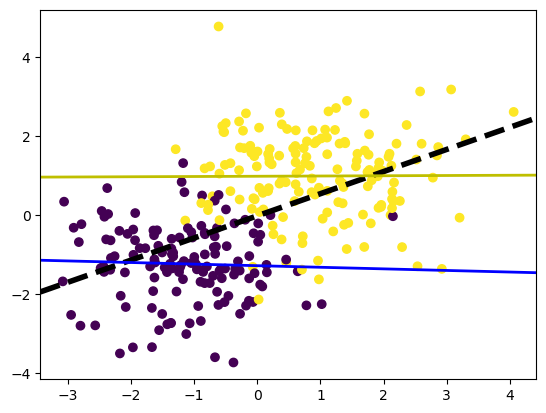

In [23]:
fig, ax = plt.subplots()

ax.scatter(X, Y, c=Z)
b, a = np.polyfit(X, Y, deg=1)
ax.axline(xy1=(0, a), slope=b, linewidth=4, color="k", linestyle="--")
b0, a0 = np.polyfit(X[Z==0], Y[Z==0], deg=1)
ax.axline(xy1=(0, a0), slope=b0, linewidth=2, color="b", linestyle="-")
b1, a1 = np.polyfit(X[Z==1], Y[Z==1], deg=1)
ax.axline(xy1=(0, a1), slope=b1, linewidth=2, color="y", linestyle="-")